# Spectral methods for phase retrieval : the setting and the plots of the spectra

We consider the phase retrieval problem in a general Bayes-optimal case, that is:
$$y_\mu \sim P_{\rm out} \left[ \cdot \middle | \frac{1}{\sqrt{n}}(\Phi x)_\mu \right]. $$

We have $x \in \mathbb{R}^n$, $y \in \mathbb{R}^m$ and $m/n \to \alpha > 0$. We consider a matrix $\Phi$ that is rotationally invariant, that is $\frac{1}{\sqrt{n}}\Phi = U \Sigma V^\intercal$, and $\nu$ is the asymptotic distribution of $\Phi^\intercal \Phi/ n$.
The signal $x$ has a prior $P_x$ with zero mean and variance $\rho = 1$. We also scale the matrix $\Phi$ such that asymptotically 
    $\frac{1}{nm} \mathbb{E}\left[{\rm Tr}\left(\Phi^\intercal \Phi\right)\right] = 1$.
Finally, the channel is assumed to be symmetric, and we will consider two different channels:
- Noiseless case, $P_{\rm out}(y|z) = \delta(y-z^2)$
- Poisson case, $P_{\rm out}(y|z) = e^{-\lambda z^2} \sum_{n=0}^\infty \frac{\left(\lambda z^2\right)^n}{n!} \delta(y-n)$, with $\lambda > 0$ a kind of snr. 

We will also consider the case in which the variables $x$ and $\mathbf{\Phi}$ are complex.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

## Plots of the transition in the spectrum

### Complex Gaussian, noiseless channel 

In [31]:
#Loading the data
filename = "Data/results_transition_complex_gaussian_noiseless.pkl"
infile = open(filename,'rb')
results = pickle.load(infile)
infile.close()
spectrums = results['spectrums']
q_LAMP = results['q_LAMP']
q_TAP = results['q_TAP']
alphas = results['alphas']

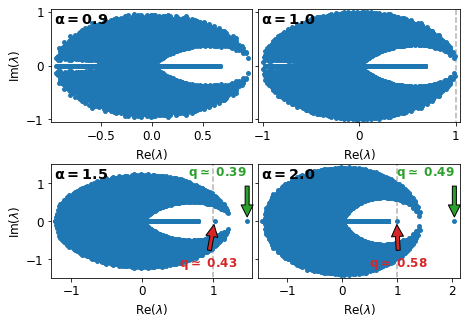

In [33]:
#The LAMP plots
plt.rcParams.update({'font.size': 12})
golden = (1+np.sqrt(5.))/2
width = 4
fig, axes = plt.subplots(2,2,figsize=(10/1.5,7/1.5),sharey='row')
counter_axes = 0
for (i_a,alpha) in enumerate(alphas):
    #Plot of the LAMP spectrum
    ax = axes[counter_axes // 2][counter_axes % 2 ]
    ax.locator_params(axis='y', nbins=3)
    ax.locator_params(axis='x', nbins=4)
    evalues_re = np.real(spectrums[i_a]['LAMP'])
    evalues_im = np.imag(spectrums[i_a]['LAMP'])
    ax.set_xlim(min(evalues_re)*1.05, max(evalues_re)*1.05)
    ax.set_ylim(min(evalues_im)*1.05, max(evalues_im)*1.05)
    ax.plot([1,1],[-100, 100],linestyle='--',color='grey',zorder=0,alpha=0.6,linewidth=1.5)
    ax.scatter(evalues_re,evalues_im,s=15,zorder=1)
    ax.set_xlabel(r"$\mathrm{Re}(\lambda)$")
    if counter_axes % 2 == 0:
        ax.set_ylabel(r"$\mathrm{Im}(\lambda)$")

    ax.set_title(r'$\mathbf{\alpha = }$'+str(alpha),x = 0.15,y = 0.82,fontweight='bold')
    counter_axes += 1

    if alpha > 1:
        #Find the largest and closest to one
        largest_i = np.where(evalues_re == max(evalues_re))
        largest_re = evalues_re[largest_i]
        largest_im = evalues_im[largest_i]
        modulus_one = np.abs(evalues_re-1.)**2 + np.abs(evalues_im)**2
        closest_to_one_i = np.where(modulus_one == min(modulus_one))
        closest_to_one_re = evalues_re[closest_to_one_i]
        closest_to_one_im = evalues_im[closest_to_one_i]
        x = largest_re 
        ax.annotate(r"$\mathbf{q \simeq}$ "+str(round(q_LAMP[i_a]['mean']['Largest'],2)), xy=(largest_re, largest_im), xytext=(x, largest_im+1.5),arrowprops=dict(facecolor='tab:green', shrink=0.1),zorder=2,color='tab:green', fontweight='bold',horizontalalignment='right', verticalalignment='top')  
        ax.annotate(r"$\mathbf{q \simeq}$ "+str(round(q_LAMP[i_a]['mean']['Closest to 1'],2)), xy=(closest_to_one_re, closest_to_one_im), xytext=(closest_to_one_re-0.5, closest_to_one_im-1.2),arrowprops=dict(facecolor='tab:red', shrink=0.1),zorder=2,color='tab:red', fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(wspace=0.03,hspace = 0.37)
plt.savefig("figures/transition_spectrum_lamp_channel_noiseless.png", bbox_inches='tight',dpi=200)

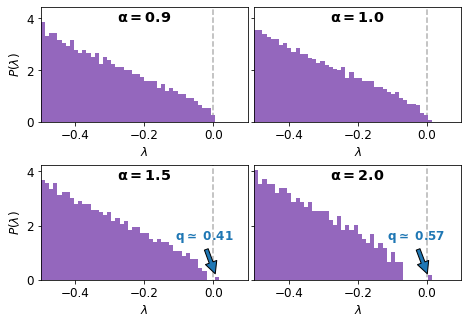

In [27]:
#Plot of TAP spectrum
plt.rcParams.update({'font.size': 12})
fig, axes = plt.subplots(2,2,figsize=(10/1.5,7/1.5),sharey='row')
counter_axes = 0
for (i_a,alpha) in enumerate(alphas):
    #Plot of the TAP spectrum
    ax = axes[counter_axes // 2][counter_axes % 2 ]
    evalues = np.array(spectrums[i_a]['TAP']) - 1.
    ax.set_xlim(0.5- 1.,1.1- 1.)
    ax.hist(evalues,range=[0.5- 1.,1.1- 1.],bins=50,density= True,zorder=1,color='tab:purple')
    if counter_axes % 2 == 0:
        ax.set_ylabel(r"$P(\lambda)$")
    ax.set_xlabel(r"$\lambda$")

    ax.set_title(r'$\mathbf{\alpha = }$'+str(alpha),x = 0.5,y = 0.82,fontweight='bold')
    counter_axes += 1
    #FInd the largest
    if alpha > 1:
        largest_i = np.where(evalues == max(evalues))
        largest = evalues[largest_i]
        ax.annotate(r"$\mathbf{q \simeq}$ "+str(round(q_TAP[i_a]['mean']['Largest'],2)), xy=(largest, 0.1), xytext=(largest-0.12, 1.5),arrowprops=dict(facecolor='tab:blue', shrink=0.1),zorder=2,color='tab:blue', fontweight='bold')
    #Turn autoscaling off
    min_y, max_y = ax.get_ylim()
    ax.plot([0,0],[-100,100],linestyle='--',color='grey',zorder=0,alpha=0.6,linewidth=1.5)
    ax.set_ylim(min_y, max_y*1.05)

plt.tight_layout()
plt.subplots_adjust(wspace=0.03,hspace = 0.37)
plt.savefig("figures/transition_spectrum_TAP_channel_noiseless.png", bbox_inches='tight',dpi=200)

### Complex Gaussian, Poisson matched channel

In [28]:
#Loading the data
parameters=[1.0,1.0] #Only useful for poisson.
filename = "Data/results_transition_complex_gaussian_poisson.pkl"
infile = open(filename,'rb')
results = pickle.load(infile)
infile.close()
spectrums = results['spectrums']
q_LAMP = results['q_LAMP']
q_TAP = results['q_TAP']
alphas = results['alphas']

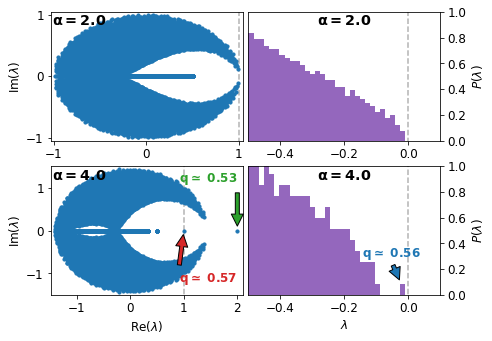

In [29]:
plt.rcParams.update({'font.size': 12})
fig, axes = plt.subplots(2,2,figsize=(7,7*7/10))
counter_axes = 0

#THE LAMP SPECTRUMS
for (i_a,alpha) in enumerate(alphas):
    #Plot of the LAMP spectrum
    ax = axes[counter_axes % 2 ][counter_axes // 2]
    ax.locator_params(axis='y', nbins=3)
    ax.locator_params(axis='x', nbins=4)
    evalues_re = np.real(spectrums[i_a]['LAMP'])
    evalues_im = np.imag(spectrums[i_a]['LAMP'])
    ax.set_xlim(min(evalues_re)*1.05, max(evalues_re)*1.05)
    ax.set_ylim(min(evalues_im)*1.05, max(evalues_im)*1.05)
    ax.plot([1,1],[-100, 100],linestyle='--',color='grey',zorder=0,alpha=0.6,linewidth=1.5)
    ax.scatter(evalues_re,evalues_im,s=10,zorder=1)

    ax.set_title(r'$\mathbf{\alpha = }$'+str(alpha),x = 0.15,y = 0.85,fontweight='bold')
    counter_axes += 1
    ax.set_ylabel(r"$\mathrm{Im}(\lambda)$")

    if alpha > 2:
        ax.set_xlabel(r"$\mathrm{Re}(\lambda)$")
        #FInd the largest and closest to one
        largest_i = np.where(evalues_re == max(evalues_re))
        largest_re = evalues_re[largest_i]
        largest_im = evalues_im[largest_i]
        modulus_one = np.abs(evalues_re-1.)**2 + np.abs(evalues_im)**2
        closest_to_one_i = np.where(modulus_one == min(modulus_one))
        closest_to_one_re = evalues_re[closest_to_one_i]
        closest_to_one_im = evalues_im[closest_to_one_i]
        ax.annotate(r"$\mathbf{q \simeq}$ "+str(round(q_LAMP[i_a]['mean']['Largest'],2)), xy=(largest_re, largest_im), xytext=(largest_re, largest_im+1.4),arrowprops=dict(facecolor='tab:green', shrink=0.1),zorder=2,color='tab:green', fontweight='bold', horizontalalignment='right', verticalalignment='top')
        ax.annotate(r"$\mathbf{q \simeq}$ "+str(round(q_LAMP[i_a]['mean']['Closest to 1'],2)), xy=(closest_to_one_re, closest_to_one_im), xytext=(closest_to_one_re-0.1, closest_to_one_im-1.2),arrowprops=dict(facecolor='tab:red', shrink=0.1),zorder=2,color='tab:red', fontweight='bold')

counter_axes = 0
#THE TAP SPECTRUMS
for (i_a,alpha) in enumerate(alphas):
    #Plot of the TAP spectrum
    ax =  axes[counter_axes % 2][1+counter_axes // 2]
    evalues = np.array(spectrums[i_a]['TAP']) - 1.
    ax.set_xlim(0.5-1.,1.1-1)
    ax.hist(evalues,range=[0.-1,1.1-1],bins=70,density= True,zorder=1,color='tab:purple')
    ax.set_ylabel(r"$P(\lambda)$")
    ax.yaxis.set_label_position("right")
    if alpha > 2:
        ax.set_xlabel(r"$\lambda$")
    ax.yaxis.set_ticks_position("right")
    ax.set_title(r'$\mathbf{\alpha = }$'+str(alpha),x = 0.5,y = 0.85,fontweight='bold')
    counter_axes += 1
    #FInd the largest
    if alpha > 2:
        largest_i = np.where(evalues == max(evalues))
        largest = evalues[largest_i]
        ax.annotate(r"$\mathbf{q \simeq}$ "+str(round(q_TAP[i_a]['mean']['Largest'],2)), xy=(largest, 0.1), xytext=(largest-0.12, 0.3),arrowprops=dict(facecolor='tab:blue', shrink=0.1),zorder=2,color='tab:blue', fontweight='bold')
    #Turn autoscaling off
    min_y, max_y = ax.get_ylim()
    ax.plot([0,0],[-100,100],linestyle='--',color='grey',zorder=0,alpha=0.6,linewidth=1.5)
    ax.set_ylim(0,1.0)

plt.tight_layout()
plt.subplots_adjust(wspace=0.03,hspace = 0.2)
plt.savefig("figures/transition_spectrum_channel_poisson.png", bbox_inches='tight',dpi=200)